In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import librosa
import librosa.display

In [3]:
from tqdm import tqdm as progressbar

In [4]:
%matplotlib inline

In [5]:
CHORD_NAMES = [
    'C', 'D', 'E', 'F', 'G', 'A', 'B',
    'Cm', 'Dm', 'Em', 'Fm', 'Gm', 'Am', 'Bm',
]
NUM_CHORDS = len(CHORD_NAMES)
BARS_PER_CHORD = 5
SECONDS_PER_BAR = 4

In [6]:
CHROMA_NAMES = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

In [7]:
y, sr = librosa.load('rendered/major-minor-acoustic.mp3')

In [8]:
print('Sample rate:', sr)
print('Signal shape:', y.shape)

Sample rate: 22050
Signal shape: (6175872,)


In [9]:
S = np.abs(librosa.stft(y))

In [10]:
chroma = librosa.feature.chroma_stft(S=S, sr=sr)

In [11]:
chroma.shape

(12, 12063)

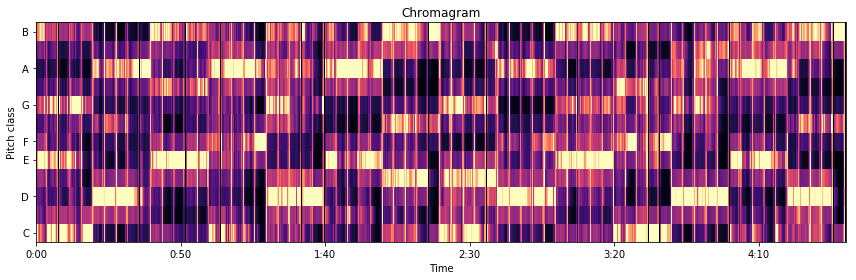

In [12]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.title('Chromagram')
plt.tight_layout()

In [13]:
chromas_per_second = chroma.shape[1] / (NUM_CHORDS * BARS_PER_CHORD * SECONDS_PER_BAR)
chromas_per_bar = chromas_per_second * SECONDS_PER_BAR

In [14]:
print('Chroma vectors per second:', chromas_per_second)
print('Chroma vectors per bar:   ', chromas_per_bar)

Chroma vectors per second: 43.082142857142856
Chroma vectors per bar:    172.32857142857142


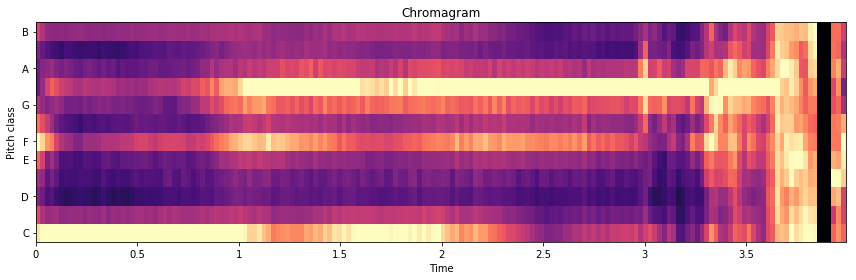

In [15]:
bar_index = 50
bar_chroma = chroma[:, int(chromas_per_bar * bar_index):int(chromas_per_bar * (bar_index + 1))]

plt.figure(figsize=(12, 4))
librosa.display.specshow(bar_chroma, y_axis='chroma', x_axis='time')
plt.title('Chromagram')
plt.tight_layout()

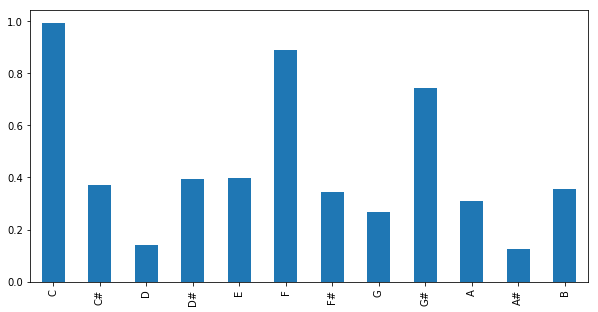

In [16]:
bar_index = 51
mean_chroma = np.mean(chroma[:, int(chromas_per_bar * bar_index) + 2:int(chromas_per_bar * bar_index) + 21], axis=1)

plt.figure(figsize=(10, 5))
ax = pd.Series(mean_chroma).plot.bar()
ax.set_xticklabels(CHROMA_NAMES)
plt.show()

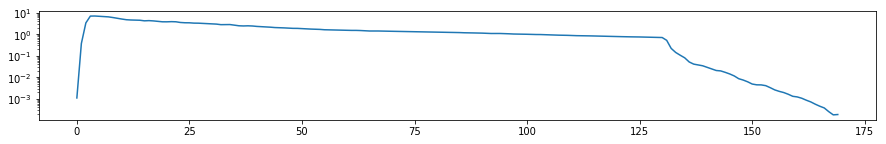

In [17]:
rms = librosa.feature.rms(S=S)
plt.figure(figsize=(15, 2))
plt.semilogy(rms.T[:170], label='RMS Energy')